In [3]:
import pandas as pd
import numpy as np

In [5]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [8]:
%matplotlib inline #주피터 노트북 내부에 그림 표시하게 명령

UsageError: unrecognized arguments: #주피터 노트북 내부에 그림 표시하게 명령


In [10]:
df = pd.read_csv("netflix_titles.csv")
print(df)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [12]:
df["country"].value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [18]:
df['count'] = df['country'].fillna('')

countries_series = df['country'].str.split(', ')

countries_exploded = countries_series.explode()

country_counts = countries_exploded.value_counts()

country_counts.head(10)
# print(country_counts)


country
United States     3296
India              990
United Kingdom     722
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64

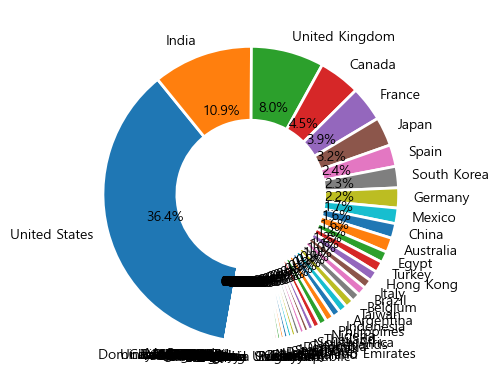

In [24]:
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(country_counts, labels=country_counts.index, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

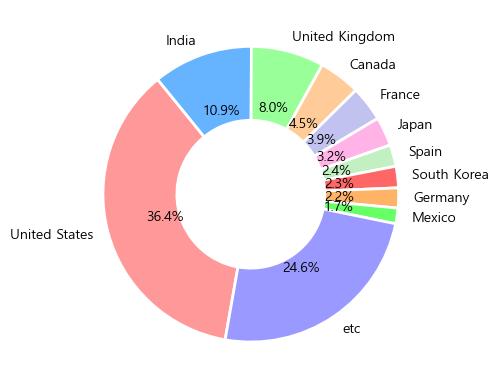

In [32]:
top_10 = country_counts.nlargest(10)

others_count = country_counts[10:].sum()

top_10['etc'] = others_count

# 원하는 색상 리스트 지정 (10개국 + 기타)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6',
          '#c2f0c2','#ff6666','#ffb366','#66ff66', '#9999ff']  # 기타 포함 11가지 색상


wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(top_10, labels=top_10.index, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [40]:
df["type"].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

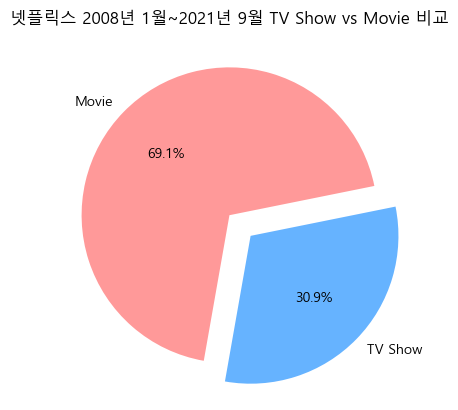

In [64]:
colors = ['#ff9999','#66b3ff']
explode = [0, 0.20]
plt.pie(df["type"].value_counts(), labels=df["type"].value_counts().index, 
        autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,
       colors=colors)
plt.title("넷플릭스 2008년 1월~2021년 9월 TV Show vs Movie 비교")
plt.show()

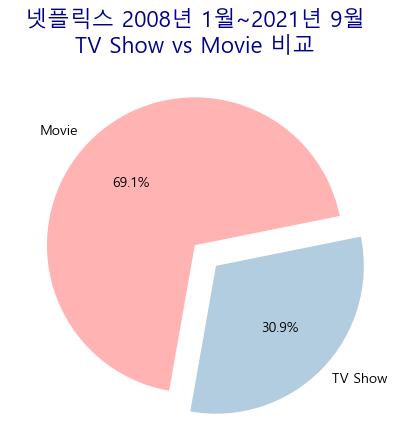

In [62]:
colors = ['#ffb3b3', '#b3cde0']
explode = [0, 0.20]
plt.pie(df["type"].value_counts(), labels=df["type"].value_counts().index, 
        autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,
       colors=colors)
plt.title("넷플릭스 2008년 1월~2021년 9월\nTV Show vs Movie 비교",
         color='darkblue', fontsize=16)
plt.show()

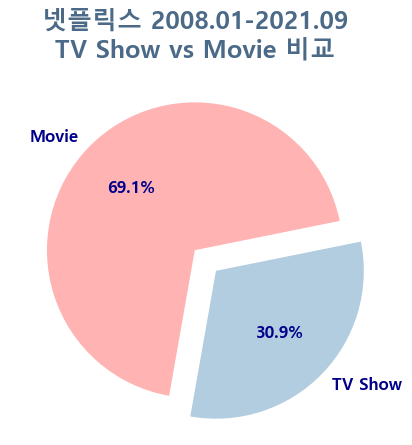

In [82]:
colors = ['#ffb3b3', '#b3cde0']
explode = [0, 0.20]

plt.pie(df["type"].value_counts(), 
        labels=df["type"].value_counts().index, 
        autopct='%.1f%%', 
        startangle=260, 
        counterclock=False, 
        explode=explode,
        colors=colors,
       textprops={'color': 'darkblue', 'fontsize': 12, 'fontweight': 'bold'})

plt.title("넷플릭스 2008.01-2021.09\nTV Show vs Movie 비교",
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontname': 'Malgun Gothic', 'color': '#4B6A88'})

plt.show()

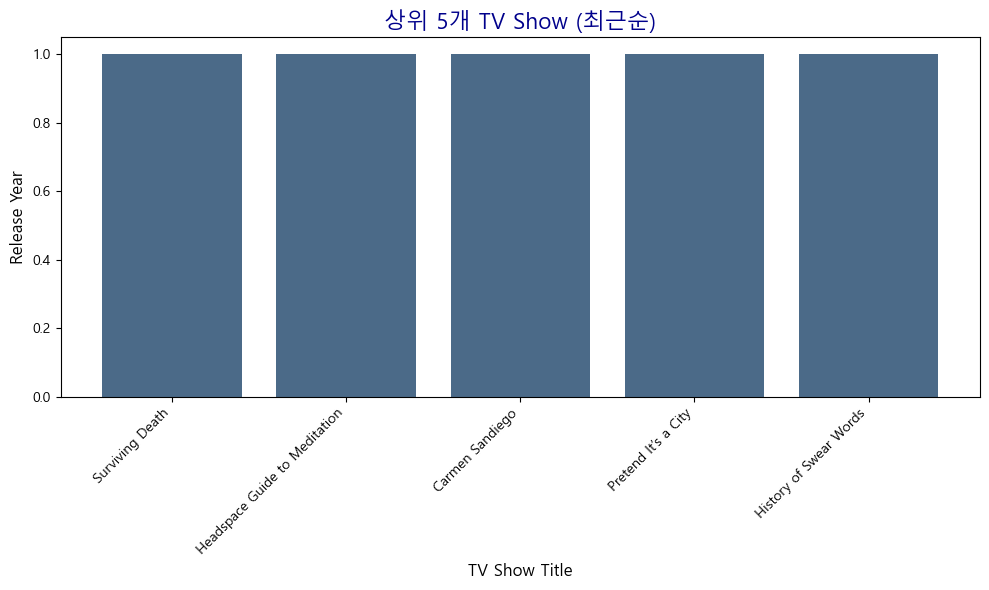

In [124]:
tv_shows = df[df['type'] == 'TV Show']
tv_shows_so = tv_shows.sort_values(by='release_year', ascending=False)
top_5_tv_shows = tv_shows_so.head(5)

plt.figure(figsize=(10, 6))
# plt.bar(top_5_tv_shows['title'], top_5_tv_shows['release_year'], color='#4B6A88')
plt.bar(top_5_tv_shows['title'], [1]*5, color='#4B6A88')  # y축 값으로는 단순히 1을 설정

plt.title('상위 5개 TV Show (최근순)', fontsize=16, color='darkblue')
plt.xlabel('TV Show Title', fontsize=12)
plt.ylabel('Release Year', fontsize=12)

# x축 라벨의 가독성을 높이기 위해 회전
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()

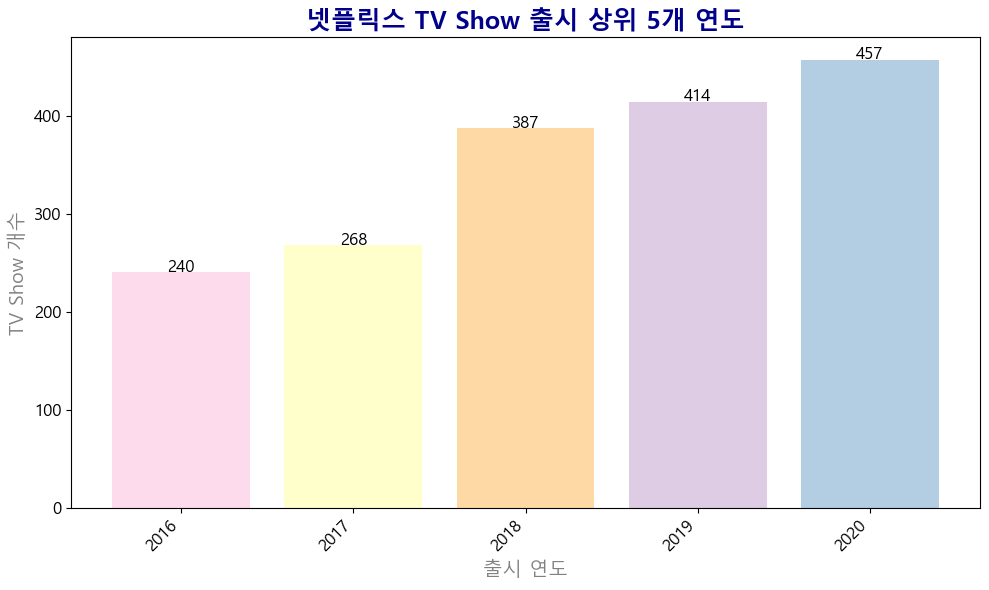

In [122]:
tv_shows = df[df['type'] == 'TV Show']

tv_shows_per_year = tv_shows.groupby('release_year').size().nlargest(5)

colors = plt.cm.Pastel1(np.linspace(0.2, 0.8, len(tv_shows_per_year)))

plt.figure(figsize=(10, 6))
plt.bar(tv_shows_per_year.index, tv_shows_per_year.values, color=colors)

# 그래프 제목과 라벨 설정
plt.title('넷플릭스 TV Show 출시 상위 5개 연도', fontsize=18, color='darkblue', fontweight='bold')
plt.xlabel('출시 연도', fontsize=14, color='gray')
plt.ylabel('TV Show 개수', fontsize=14, color='gray')

# x,y축 라벨의 가독성을 높이기 위해 회전
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(tv_shows_per_year.values):
    plt.text(tv_shows_per_year.index[i], value + 0.5, str(value), ha='center', fontsize=12, color='black')

# 그래프 표시
plt.tight_layout()
plt.show()